# Smart City Traffic Analysis Using IoT Sensor Data

In [1]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Parameters
# -----------------------------
n_rows = 1000

# Timestamp range (1 month)
all_timestamps = pd.date_range(
    start='2025-01-01',
    end='2025-01-31 23:59',
    freq='h'
)
timestamps = np.random.choice(all_timestamps, n_rows)
timestamps = pd.to_datetime(timestamps)

# Latitude and Longitude (example city bounds)
latitudes = np.random.uniform(40.0, 41.0, n_rows)
longitudes = np.random.uniform(-74.0, -73.0, n_rows)

# Towns (simple & realistic)
towns = [
    'Downtown',
    'Uptown',
    'Midtown',
    'Westside',
    'Eastside',
    'North District',
    'South District'
]
town = np.random.choice(towns, n_rows)

# Weather categories
weathers = ['Clear', 'Rainy', 'Foggy']
weather = np.random.choice(weathers, n_rows)

# Traffic volume: depends on hour of day + some noise
hours = timestamps.hour
traffic_volume = (hours * 50 + np.random.randint(50, 200, n_rows)).astype(int)

# Accidents: mostly 0 or 1, rare 2 or 3
accidents = np.random.choice([0, 1, 2, 3], n_rows, p=[0.7, 0.2, 0.08, 0.02])

# Congestion (binary target)
threshold = 500
congestion = (traffic_volume > threshold).astype(int)

# -----------------------------
# 2. Create DataFrame
# -----------------------------
df = pd.DataFrame({
    'Timestamp': timestamps.strftime('%d/%m/%Y %H:%M'),
    'Town': town,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Traffic_Volume': traffic_volume,
    'Weather': weather,
    'Accidents': accidents,
    'Congestion': congestion
})

# -----------------------------
# 3. Save CSV
# -----------------------------
df.to_csv('smart_city_traffic_synthetic.csv', index=False)
print("Synthetic dataset with towns generated (1000 rows).")


Synthetic dataset with towns generated (1000 rows).


# STEP 1 Data overview

In [2]:
import pandas as pd

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("smart_city_traffic_synthetic.csv")

# -----------------------------
# 2. Basic Overview
# -----------------------------
print("===== Shape =====")
print(df.shape)

print("\n===== Columns & Data Types =====")
print(df.dtypes)

print("\n===== First 5 Rows =====")
print(df.head())

print("\n===== Last 5 Rows =====")
print(df.tail())

print("\n===== Summary Statistics =====")
print(df.describe())

print("\n===== Check for Null Values =====")
print(df.isnull().sum())

print("\n===== Unique Values per Column =====")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


===== Shape =====
(1000, 8)

===== Columns & Data Types =====
Timestamp          object
Town               object
Latitude          float64
Longitude         float64
Traffic_Volume      int64
Weather            object
Accidents           int64
Congestion          int64
dtype: object

===== First 5 Rows =====
          Timestamp            Town   Latitude  Longitude  Traffic_Volume  \
0  26/01/2025 03:00        Eastside  40.602838 -73.839036             320   
1  02/01/2025 11:00  North District  40.523160 -73.329062             662   
2  14/01/2025 18:00  South District  40.419559 -73.999358            1090   
3  25/01/2025 06:00  North District  40.298522 -73.500595             459   
4  24/01/2025 20:00        Downtown  40.850035 -73.990287            1155   

  Weather  Accidents  Congestion  
0   Clear          0           0  
1   Clear          0           1  
2   Clear          1           1  
3   Clear          0           0  
4   Foggy          0           1  

===== Last 5 Row

# STEP 2 Data Manuplation

# STEP 3 Train/Test Split

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("smart_city_traffic_synthetic.csv")

# -----------------------------
# 2. Feature Engineering
# -----------------------------
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df['Hour'] = df['Timestamp'].dt.hour

# Encode Weather
weather_mapping = {'Clear': 0, 'Rainy': 1, 'Foggy': 2}
df['Weather'] = df['Weather'].map(weather_mapping)

# Features and target
X = df[['Hour', 'Weather', 'Latitude', 'Longitude', 'Traffic_Volume', 'Accidents']]
y = df['Congestion']

# -----------------------------
# 3. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 4. Train Random Forest Classifier
# -----------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# 5. Predict & Evaluate
# -----------------------------
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:")
print(importances)


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       146

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Feature Importances:
Traffic_Volume    0.550093
Hour              0.432148
Longitude         0.008117
Latitude          0.006863
Weather           0.001895
Accidents         0.000883
dtype: float64


# STEP 5 — Data Visulization

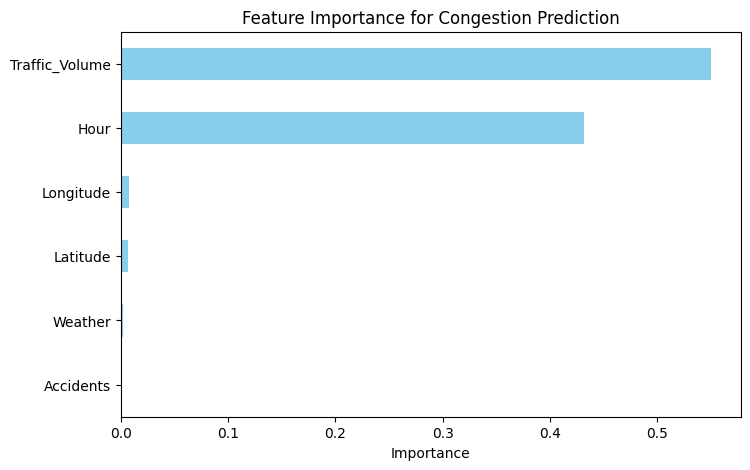

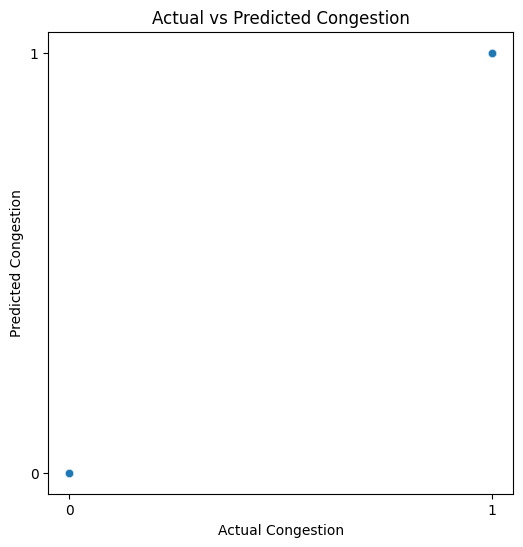

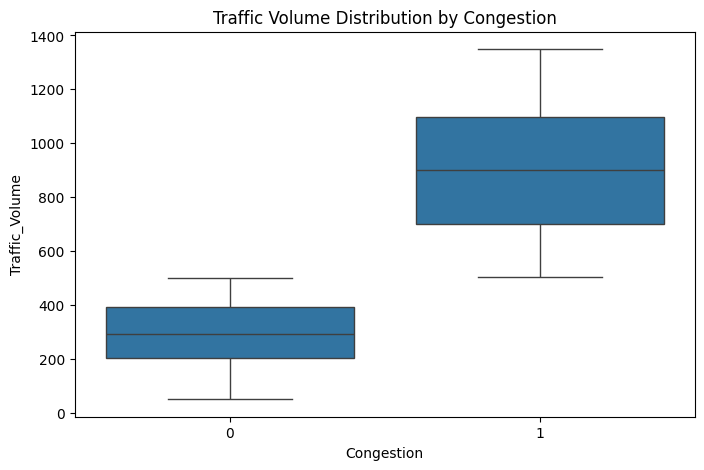

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# -----------------------------
# 1. Load dataset & prepare features
# -----------------------------
df = pd.read_csv("smart_city_traffic_synthetic.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
df['Hour'] = df['Timestamp'].dt.hour

weather_mapping = {'Clear': 0, 'Rainy': 1, 'Foggy': 2}
df['Weather'] = df['Weather'].map(weather_mapping)

X = df[['Hour', 'Weather', 'Latitude', 'Longitude', 'Traffic_Volume', 'Accidents']]
y = df['Congestion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# -----------------------------
# 2. Feature Importance Plot
# -----------------------------
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Congestion Prediction')
plt.xlabel('Importance')
plt.show()

# -----------------------------
# 3. Actual vs Predicted Congestion
# -----------------------------
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel('Actual Congestion')
plt.ylabel('Predicted Congestion')
plt.title('Actual vs Predicted Congestion')
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

# -----------------------------
# 4. Traffic Volume vs Congestion (optional)
# -----------------------------
plt.figure(figsize=(8,5))
sns.boxplot(x='Congestion', y='Traffic_Volume', data=df)
plt.title('Traffic Volume Distribution by Congestion')
plt.show()
